### Mall Customer Segmentation Data

Market Basket Analysis

In [41]:
import numpy
import pandas as pd


Load Dataset

In [42]:
data = pd.read_csv('Mall_Customers.csv')

**Data Exploration**

Perform initial exploration to understand the structure of the data.

In [43]:
# Display the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
# Display the last few rows of the dataset
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [45]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
# Get descriptive statistics
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Insight**  
* Age Mean: 38.85
* Annual Income Mean: $60.56k
* Spending Score Mean: 50.20

In [50]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

**Data Preprocessing**

Handle any missing values and perform necessary data transformations.

In [ ]:
# Check for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Data Visualization**

Visualize the data to understand distributions and relationships.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Age Distribution**

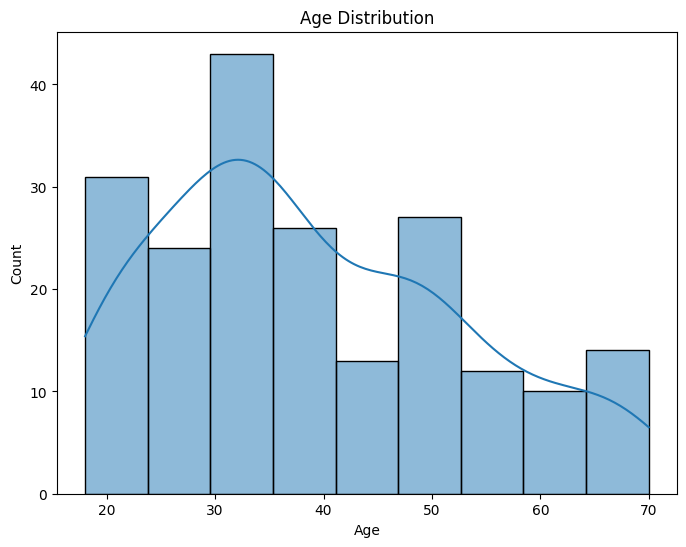

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

**Gender Distribution**

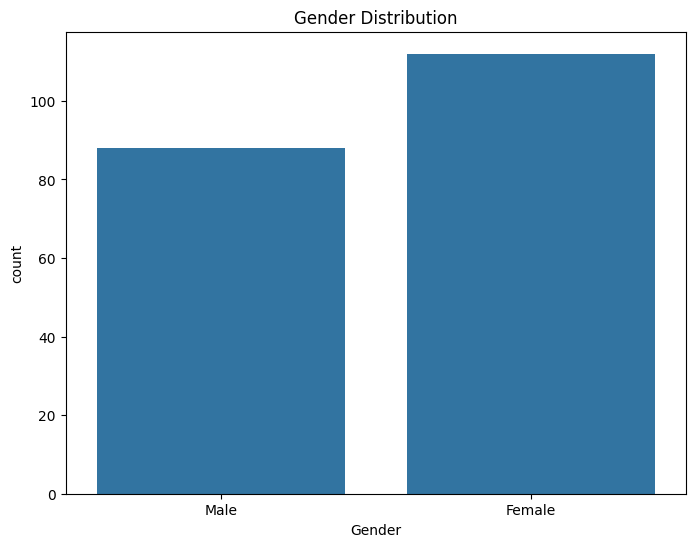

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data, x='Gender')
plt.title("Gender Distribution")
plt.show()

**Spending Score vs. Annual Income**

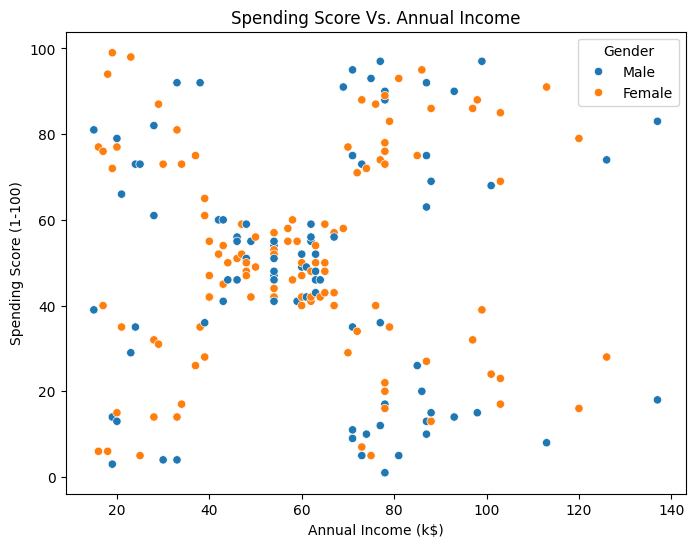

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Spending Score Vs. Annual Income")
plt.show()

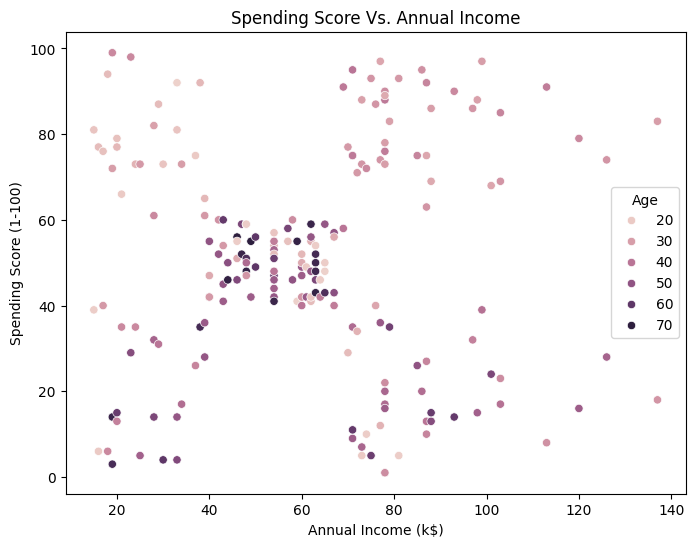

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age')
plt.title("Spending Score Vs. Annual Income")
plt.show()

**Visualizing and identify outliers**

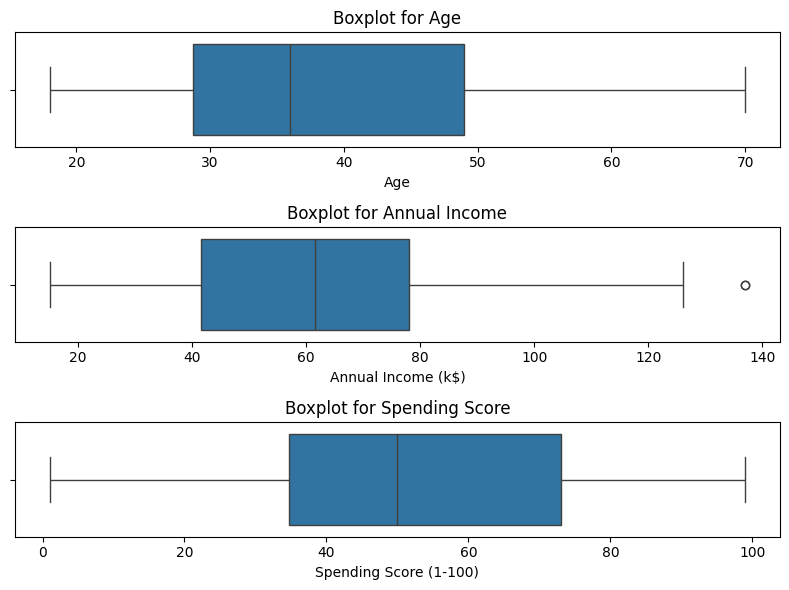

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
sns.boxplot(x=data['Age'], ax=axes[0])
axes[0].set_title('Boxplot for Age')
sns.boxplot(x=data['Annual Income (k$)'], ax=axes[1])
axes[1].set_title('Boxplot for Annual Income')
sns.boxplot(x=data['Spending Score (1-100)'], ax=axes[2])
axes[2].set_title('Boxplot for Spending Score')
plt.tight_layout()
plt.show()

**Insight**
* Annual Income was the only one with an outlier

**Feature Selection**

Select the features that will be used for clustering. 

In [ ]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

**Data Normalization**

Normalize the features to ensure they are on the same scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**Determine Optimal Number of Clusters**

Use the Elbow Method to find the optimal number of clusters.

In [ ]:
from sklearn.cluster import KMeans

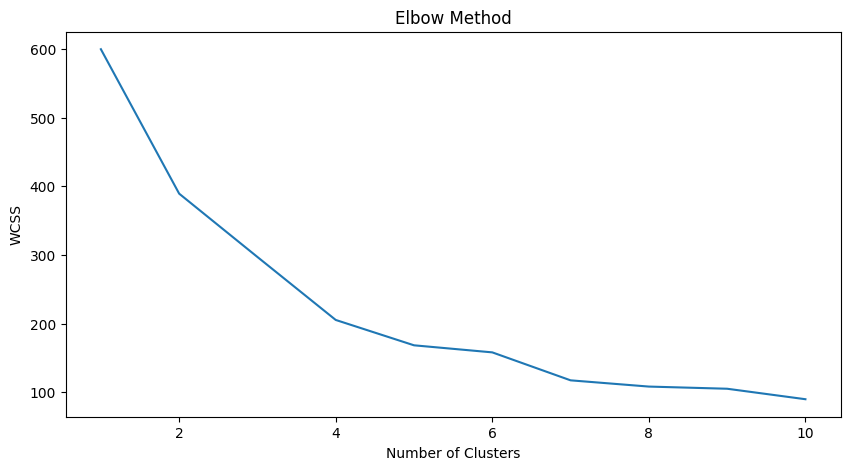

In [ ]:
wcss = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(features_scaled)
    wcss.append(Kmeans.inertia_)
    

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Apply K-means clustering**

In [ ]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(features_scaled)
data['Cluster'] = clusters

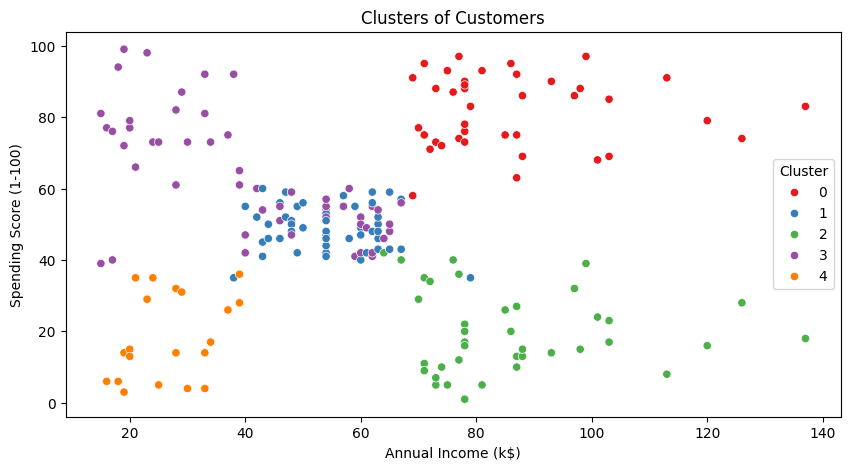

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=data)
plt.title('Clusters of Customers')
plt.show()

In [ ]:
# Analyze the characteristics of each cluster
for i in range(5):
    print(f"Cluster {i}:")
    print(data[data['Cluster'] == i].describe())

Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    40.00000  40.000000           40.000000               40.000000   
mean    161.02500  32.875000           86.100000               81.525000   
std      23.33863   3.857643           16.339036                9.999968   
min     123.00000  27.000000           69.000000               58.000000   
25%     141.50000  30.000000           74.750000               74.000000   
50%     161.00000  32.000000           78.500000               83.000000   
75%     180.50000  36.000000           94.000000               90.000000   
max     200.00000  40.000000          137.000000               97.000000   

       Cluster  
count     40.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   47.000000  47.000000           47.000000               4

**Insight**
* **Cluster 0** Avg Age of 32, With Avg Annual Income $86K And Avg Spending Score of 81.52
* **Cluster 1** Avg Age of 55, With Avg Annual Income $54k And Avg Spending Score of 48.85
* **Cluster 2** Avg Age of 39, With Avg Annual Income $86K And Avg Spending Score of 19.35
* **Cluster 3** Avg Age of 25, With Avg Annual Income $41k And Avg Spending Score of 62.24
* **Cluster 4** Avg Age of 46, With Avg Annual Income $26K And Avg Spending Score of 18.35

We have high income earners and high spending score, and avg income earners and avg spending score.
We also have low income earners and low  spending score, and low income earners and high spending score.